## 2.1 PANDAS 기본 개념
### 2.1.1 PANDAS 기본 구조
#### 2.1.1.1 PANDAS
  - Numpy 기반으로 개발되어 고성능 데이터 분석 가능
  - R언어에서 제공하는 DataFrame 자료형 제공
  - 명시적으로 축의 이름에 따라 데이터 정렬 가능한 자료구조
  - 통합된 Time Series 분석 기능
  - 누락된 데이터를 유연하게 처리할 수 있는 기능
  - 구조화된 데이터의 처리를 지원하는 Python 라이브러리

In [0]:
import numpy as np
import pandas as pd

logx = np.logspace(0, 1, 100)
linex = np.linspace(0,10,100)

In [2]:
# PANDAS 데이터 프레임 생성
df = pd.DataFrame()
df['logspace'] = logx
df['linespace'] = linex

df.tail(10)

,logspace,linespace
90,8.111308,9.090909
91,8.302176,9.191919
92,8.497534,9.292929
93,8.697490,9.393939
94,8.902151,9.494949
95,9.111628,9.595960
96,9.326033,9.696970
97,9.545485,9.797980
98,9.770100,9.898990
99,10.000000,10.000000


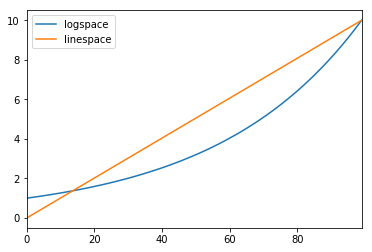

In [3]:
df.plot()

#### 2.1.1.2 DataFrame
    - 레이블(Labeled)된 행(Columns)과 열(Row)를 가진 2차원 데이터구조
    - 칼럼마다 데이터 형식이 다를 수 있음
    - 각 행(Column)과 열(Row)들을 산술연산이 가능한 구조
    - DataFrame 크기는 유동적으로 변경 가능
    - DataFrame끼리 여러가지 조건을 사용한 결합처리 가능
 

#### 2.1.1.3 Series와 DataFrame
    - Series: 인덱스 라벨이 붙은 1차원 리스트 데이터 구조
    - DataFrame: Series가 모인 2차원 테이블 데이터 구조
    - DataFrame이 핵심이고, Series는 개념으로 알아두기

### 2.1.2 PANDAS 데이터 로딩
#### 2.1.2.1 CSV
    - Read_csv => 대부분의 경우 CSV를 읽어들여 사용한다.

In [4]:
# 텍스트 파일 쓰기
%%writefile sample1.csv

c1, c2, c3
1, 1.11, one
2, 2.22, two
3, 3.33, three

Writing sample1.csv


In [5]:
# CSV 파일 읽어오기
pd.read_csv('sample1.csv')

,c1,c2,c3
0,1,1.11,one
1,2,2.22,two
2,3,3.33,three


### 2.1.2.2 Web
    - Pandas_datareader 패키지의 DataReader을 사용하면 인터넷 사이트의 자료를 바로 PANDAS로 로딩 가능하다.

In [6]:
import pandas_datareader as pdr
import datetime

dt_start = datetime.datetime(2017,1,1)
dt_end = "2017, 12, 30"
gdp = pdr.get_data_fred('GDP', dt_start, dt_end)
gdp.head()

,GDP
DATE,
2017-01-01,19190.431
2017-04-01,19356.649
2017-07-01,19611.704
2017-10-01,19918.910


#### 2.1.2.3 파이썬 자료구조 로딩

In [7]:
# 리스트 안을 딕셔너리 타입으로 입력
ds = [
    {'고객':'A', '금액':'1000', '가맹점':'0001', '카드':'9440'},
    {'고객':'B', '금액':'5000', '가맹점':'0002', '카드':'4805'},
    {'고객':'C', '금액':'10000', '가맹점':'0003', '카드':'4602'}
]

df = pd.DataFrame(ds)
df

,가맹점,고객,금액,카드
0,0001,A,1000,9440
1,0002,B,5000,4805
2,0003,C,10000,4602


##### LIST

In [8]:
# 리스트 타입으로 입력 
ds = [
    ['A', 1000, '0001', '9440'],
    ['B', 5000, '0002', '4805'],
    ['C', 10000, '0003', '4602']
]

lb = ['고객', '금액', '가맹점', '카드']

df = pd.DataFrame(ds, columns=lb)
df

,고객,금액,가맹점,카드
0,A,1000,0001,9440
1,B,5000,0002,4805
2,C,10000,0003,4602


In [9]:
# 딕셔너리 타입으로 입력
ds = {
    '고객': ['A', 'B', 'C'],
    '금액': [1000, 5000, 10000],
    '가맹점': ['0001', '0002', '0003'],
    '카드': ['9440', '4805', '4602']
}

df = pd.DataFrame.from_dict(ds)
df

,고객,금액,가맹점,카드
0,A,1000,0001,9440
1,B,5000,0002,4805
2,C,10000,0003,4602


## 2.2 PANDAS 객체
### 2.2.1 Series 객체
  - Subclass of numpy.ndarray
  - Data: anytype
  - Index labels need not be ordered
  - Duplicates are possible (but results in reduced functionality)

In [10]:
data = pd.Series([0.25, 0.5, 0.75, 1])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [11]:
# numpy 배열
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [12]:
# index 객체
data.index

RangeIndex(start=0, stop=4, step=1)

In [13]:
data = pd.Series([1,2,3], index=['one', 'two', 'three'])
data

one      1
two      2
three    3
dtype: int64

In [14]:
data = pd.DataFrame([1,2,3], index=['one', 'two', 'three'], columns=['No.'])
data

,No.
one,1
two,2
three,3


#### 딕셔너리와 Series

In [15]:
score_dict = {'c':80, 'c++':90, 'java':100}
score = pd.Series(score_dict)
score

c        80
c++      90
java    100
dtype: int64

In [16]:
score['c']

80

In [17]:
# 슬라이싱
score['c':'c++']

c      80
c++    90
dtype: int64

#### 시리즈의 연산에서 index매칭이 되지 않으면 Nan

In [18]:
subject = ['c', 'c++', 'python', 'matlab']
score2 = pd.Series(score, index=subject)
score2

c         80.0
c++       90.0
python     NaN
matlab     NaN
dtype: float64

In [19]:
score + score2

c         160.0
c++       180.0
java        NaN
matlab      NaN
python      NaN
dtype: float64

### 2.2.2 DataFrame 객체
#### Series를 모아서 만든 Data Table -> 2차원의 구조 (ExcelSheet, DBMS table, R dataframe)
    - Numpy array-like
    - Each column can have a different type
    - Row and column index
    - Size mutable: insert and delete columns

In [20]:
from pandas import Series, DataFrame

a = pd.DataFrame(
  [
      [1,2,3],
      [4,5,6],
      [7,8,9]
  ])

a

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


In [21]:
# Dictionary객체를 이용한 DataFrame 생성

data = {
    'subject': ['c', 'c++', 'java', 'python'],
    'score': [80, 90, 100, 50]
}

df = pd.DataFrame(data)
df

,subject,score
0,c,80
1,c++,90
2,java,100
3,python,50


In [22]:
df = DataFrame(data, columns=['score', 'subject'])
df

,score,subject
0,80,c
1,90,c++
2,100,java
3,50,python


In [23]:
df=DataFrame(data, columns=['score', 'subject', 'aux'])
df

,score,subject,aux
0,80,c,NaN
1,90,c++,NaN
2,100,java,NaN
3,50,python,NaN


In [24]:
df = DataFrame(data, index=['Steph','Steve','Selena','Ellen'])
df

,subject,score
Steph,c,80
Steve,c++,90
Selena,java,100
Ellen,python,50


#### 타이타닉 데이터 가져와서 그냥 쉬운 modi해보기

In [25]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2.1.2.1. DataFrame Columns
#### 컬럼명으로 데이터 가져오기

In [26]:
DataFrame(data, columns=['Sex', 'City']).head()

,Sex,City
0,male,NaN
1,female,NaN
2,female,NaN
3,female,NaN
4,male,NaN


#### 만약 컬럼이 존재하지 않을 경우 새로운 컬럼을 생성하고 NaN으로 초기화

In [0]:
df = DataFrame(data, columns=['Sex', 'City', 'Salary']).head()

In [28]:
df

,Sex,City,Salary
0,male,NaN,NaN
1,female,NaN,NaN
2,female,NaN,NaN
3,female,NaN,NaN
4,male,NaN,NaN


In [29]:
# 컬럼명을 통해 각각의 Series 가져오기
data.Name.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [30]:
df.City

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: City, dtype: float64

In [31]:
data['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

#### Column 명 변경
##### DataFrame의 rename
  - pd.DataFrame.columns=['컬럼1', '컬럼2', ...]
  - pd.DataFrame.rename({'OLD컬럼명':'NEW컬럼명', ...., } axis=1)
  - pd.DataFrame.renmae(columns={'OLD컬럼명':'NEW컬럼명', ...})

In [32]:
df.rename(columns={'salary':'sal'})

,Sex,City,Salary
0,male,NaN,NaN
1,female,NaN,NaN
2,female,NaN,NaN
3,female,NaN,NaN
4,male,NaN,NaN


In [33]:
# 왜 안바뀌지??
df.rename(columns={'salary':'sal'})

,Sex,City,Salary
0,male,NaN,NaN
1,female,NaN,NaN
2,female,NaN,NaN
3,female,NaN,NaN
4,male,NaN,NaN


In [34]:
# 대소문자 차이때매 그럼^^
df.rename(columns={'Salary':'sal'})

,Sex,City,sal
0,male,NaN,NaN
1,female,NaN,NaN
2,female,NaN,NaN
3,female,NaN,NaN
4,male,NaN,NaN


In [35]:
df.rename({'Sex':'sex'}, axis=1)

,sex,City,Salary
0,male,NaN,NaN
1,female,NaN,NaN
2,female,NaN,NaN
3,female,NaN,NaN
4,male,NaN,NaN


In [36]:
data = {
    'subject': ['Korean', 'Math', 'English'],
    'score': [100,100,100]
}

df = pd.DataFrame(data)
df

,subject,score
0,Korean,100
1,Math,100
2,English,100


In [37]:
df.T

,0,1,2
subject,Korean,Math,English
score,100,100,100


### 2.2.3 INDEX 객체
#### 2.2.3.1 INDEX
  - 불변의 배열, 정렬된 집합
  - Series와 DataFrame객체가 데이터를 참조하고 수정하게 해주는 역할
  - Pandas index 객체는 표형식의 데이터에서 각행과 열에 대한 헤더(이름)
  - 메타데이터(축의 이름)을 저장하는 객체
  - Series DataFrame 객체 생성시 사용되는 배열이나 순차적인 이름은 내부적으로 indexing

In [38]:
idx = pd.Index([1,2,3,4,5])
idx

Int64Index([1, 2, 3, 4, 5], dtype='int64')

In [39]:
idx[0]

1

In [40]:
idx[::2]

Int64Index([1, 3, 5], dtype='int64')

In [41]:
idx[::3]

Int64Index([1, 4], dtype='int64')

In [42]:
print(idx.size, idx.shape, idx.ndim, idx.dtype)

5 (5,) 1 int64


In [43]:
# 인덱스는 변경 불가능한 배열!!!
idx[1] = 123

TypeError: ignored

#### 2.2.3.2 Reindex

In [44]:
df = pd.DataFrame(np.arange(9).reshape(3,3),
                 index=[1,3,5], columns=['a','b','c'])

df

,a,b,c
1,0,1,2
3,3,4,5
5,6,7,8


In [45]:
df2 = df.reindex([1,2,3,4], method='ffill') #front fill
df2

,a,b,c
1,0,1,2
2,0,1,2
3,3,4,5
4,3,4,5


#### Row보간 가능

In [46]:
col = ['a','b','f','c']
df2.reindex(columns=col, method='ffill')

,a,b,f,c
1,0,1,2,2
2,0,1,2,2
3,3,4,5,5
4,3,4,5,5


## 2.3 데이터 선택하기
### 2.3.1 Series Selection
  - Series의 인덱스는 딕셔너리타입과 유사하게 동작
  - 딕셔너리 인터페이스를 통해 Series 인덱스 조작

In [0]:
train = pd.read_csv('train.csv')

In [48]:
train[['Name','Sex', 'Age']].head(6)

,Name,Sex,Age
0,"Braund, Mr. Owen Harris",male,22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,"Heikkinen, Miss. Laina",female,26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,"Allen, Mr. William Henry",male,35.0
5,"Moran, Mr. James",male,NaN


In [49]:
train[:3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [50]:
train['Name'][:3]

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
Name: Name, dtype: object

In [51]:
data = pd.Series([0.25, 0.5, 0.75, 1], index=['a','b','c','d'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [52]:
data['b']

0.5

In [53]:
'a' in data

True

In [54]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [55]:
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

In [56]:
data.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [57]:
Age_Series = train['Age']
Age_Series[1:10:2].head(4)

1    38.0
3    35.0
5     NaN
7     2.0
Name: Age, dtype: float64

In [58]:
Age_Series[[1,10,2]].head(4)

1     38.0
10     4.0
2     26.0
Name: Age, dtype: float64

#### Series Indexer(loc, iloc)

In [59]:
data = pd.Series(['a','b','c'], index=[1,2,3])
data

1    a
2    b
3    c
dtype: object

In [60]:
data[1]

'a'

In [61]:
data[1:3]

2    b
3    c
dtype: object

In [62]:
data.loc[1]

'a'

In [63]:
data.iloc[1]

'b'

In [64]:
data.loc[1:3]

1    a
2    b
3    c
dtype: object

In [65]:
data.iloc[1:3]

2    b
3    c
dtype: object

#### Series 1차원 배열

In [66]:
data = pd.Series([0.25, 0.5, 0.75, 1], index=['a','b','c','d'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [67]:
data['a':'c']

a    0.25
b    0.50
c    0.75
dtype: float64

In [68]:
data[0:2]

a    0.25
b    0.50
dtype: float64

In [69]:
data[(data>0.3) & (data<0.8)]

b    0.50
c    0.75
dtype: float64

In [70]:
data[['a','d']]

a    0.25
d    1.00
dtype: float64

In [71]:
data[data<=0.5]

a    0.25
b    0.50
dtype: float64

In [0]:
train.index = train['Name']

In [73]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [74]:
del train['Name']
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


#### Loc: 인덱스 값, iloc: 순서

In [75]:
train[['Sex', 'Age']][:2]

,Sex,Age
Name,,
"Braund, Mr. Owen Harris",male,22.0
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0


In [76]:
train.loc['Braund, Mr. Owen Harris', 'Age']

22.0

In [77]:
k = train.iloc[:4, :3]
k

,PassengerId,Survived,Pclass
Name,,,
"Braund, Mr. Owen Harris",1,0,3
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1
"Heikkinen, Miss. Laina",3,1,3
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1


### 2.3.2 DataDrop

In [78]:
k.drop('Braund, Mr. Owen Harris').head(3)

,PassengerId,Survived,Pclass
Name,,,
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1
"Heikkinen, Miss. Laina",3,1,3
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1


In [79]:
train.drop(['Braund, Mr. Owen Harris', 'Heikkinen, Miss. Laina'], axis=0).head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [80]:
train.drop('Fare', axis=1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked
Name,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,C123,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,NaN,S
"Moran, Mr. James",6,0,3,male,NaN,0,0,330877,NaN,Q
"McCarthy, Mr. Timothy J",7,0,1,male,54.0,0,0,17463,E46,S
"Palsson, Master. Gosta Leonard",8,0,3,male,2.0,3,1,349909,NaN,S
"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",9,1,3,female,27.0,0,2,347742,NaN,S


## 2.4 DataFrame 연산
### 2.4.1 Series객체 연산
  - Index가 다른 Series 객체 연산
  - Index가 매칭되는 값만 연산, 매칭되지 않으면 NaN값 Return

In [81]:
s1 = Series([1,2,3,4], index=['a','b','c','d'])
s2 = Series([4,3,2,1], index = ['a', 'b', 'e', 'f'])
s1+s2

a    5.0
b    5.0
c    NaN
d    NaN
e    NaN
f    NaN
dtype: float64

#### DataFrame연산 -> 같은 자리의 값 덧셈

In [82]:
df1 = DataFrame(np.arange(9).reshape(3,3), columns=['서울','대전','대구'], index=['a','b','c'])
df2 = DataFrame(np.arange(9).reshape(3,3), columns=['서울','대전','대구'], index=['a','b','c'])
print(df1)
print(df2)
print(df1+df2)

   서울  대전  대구
a   0   1   2
b   3   4   5
c   6   7   8
   서울  대전  대구
a   0   1   2
b   3   4   5
c   6   7   8
   서울  대전  대구
a   0   2   4
b   6   8  10
c  12  14  16


#### 칼럼이 다를 경우 매칭되지 않는 컬럼은 NaN

In [84]:
df1 = DataFrame(np.arange(9).reshape(3,3), columns=['a','b','c'])
df2 = DataFrame(np.arange(12).reshape(3,4), columns=['a','b','c','d'])

print(df1)
print(df2)
print(df1+df2)

   a  b  c
0  0  1  2
1  3  4  5
2  6  7  8
   a  b   c   d
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11
    a   b   c   d
0   0   2   4 NaN
1   7   9  11 NaN
2  14  16  18 NaN


#### ADD 메소드를 사용하면 NaN 값으로 0으로 변환하여 처리

In [85]:
df1.add(df2, fill_value=0)

,a,b,c,d
0,0,2,4,3.0
1,7,9,11,7.0
2,14,16,18,11.0
